# Volcanic Forcings: CMIP5 vs CMIP6
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

In [7]:
!date

Tue Mar 27 14:58:10 EDT 2018


In [18]:
%matplotlib notebook
from geoplots import yticks2lat, xticksmonth

## Data

In [8]:
# Parameters
data_name = 'extsw_b05'
p = 50
nclist = [{'tag': 'CMIP5', 'ncfile': '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP5/extsw_data.nc'},
          {'tag': 'CMIP6', 'ncfile': '/tigress/gvecchi/CM2.5/input/VOLCANIC/CMIP6/extsw_V3_DATATROP_RCP.nc'}
         ]

In [12]:
dss = dict()
das = list()
for nc in nclist:
    tag = nc['tag']
    ncfile = nc['ncfile']
    ds = xr.open_dataset(ncfile)
    dss[tag] = ds
    da = ds[data_name].isel(lon=0).sum('pfull').load()
    das.append(da)
da = xr.concat(das, pd.Index([nc['tag'] for nc in nclist], name='Source'))
print(da)

<xarray.DataArray 'extsw_b05' (Source: 2, time: 3012, lat: 90)>
array([[[  1.394868e-06,   1.396021e-06, ...,   1.619228e-06,   1.621322e-06],
        [  1.327876e-06,   1.329262e-06, ...,   1.545495e-06,   1.547274e-06],
        ..., 
        [           nan,            nan, ...,            nan,            nan],
        [           nan,            nan, ...,            nan,            nan]],

       [[  2.363307e-06,   2.362189e-06, ...,   2.690831e-06,   2.691061e-06],
        [  2.090381e-06,   2.089473e-06, ...,   3.577462e-06,   3.577189e-06],
        ..., 
        [  4.309876e-06,   4.311938e-06, ...,   6.823959e-06,   6.824154e-06],
        [  4.468351e-06,   4.470337e-06, ...,   6.906070e-06,   6.906551e-06]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16 1850-02-16 1850-03-16 ...
  * lat      (lat) float32 -89.0 -87.0 -85.0 -83.0 -81.0 -79.0 -77.0 -75.0 ...
    lon      float32 1.0
  * Source   (Source) object 'CMIP5' 'CMIP6'


## CMIP6 vs CMIP5

<IPython.core.display.Javascript object>


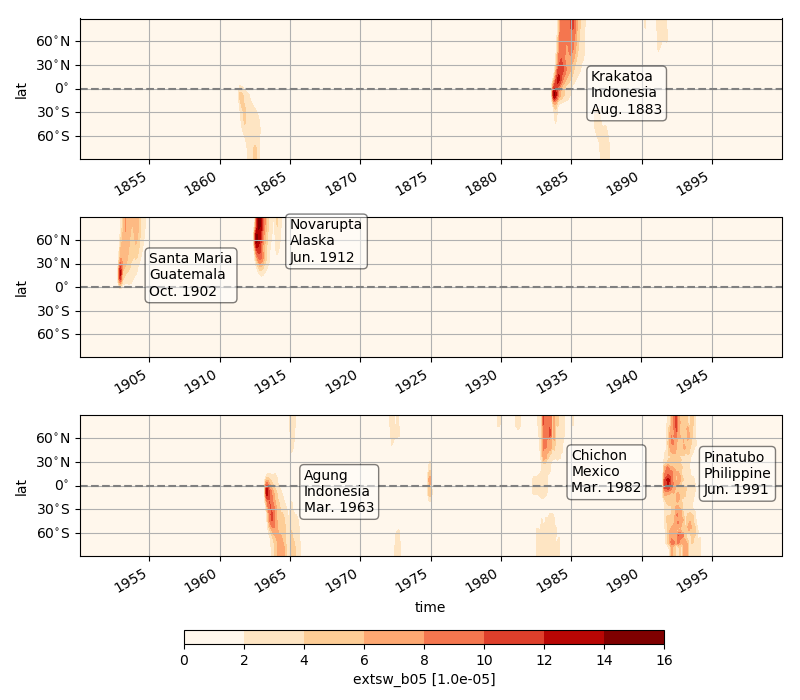

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [15]:
# CMIP6
scale_factor = 1e5
da_ = da.pipe(lambda x:x*scale_factor).sel(Source='CMIP6')

bbox = {'facecolor': 'w', 'alpha':.5, 'boxstyle': 'round'}

fig, axes = plt.subplots(3,1,figsize=(8,7), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)

plt.sca(axes[0])
da_.sel(time=slice('1850', '1899')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)

plt.title('')
plt.xlabel('time')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1886-06', -6, 'Krakatoa\nIndonesia\nAug. 1883', va='center', bbox=bbox)


plt.sca(axes[1])
da_.sel(time=slice('1900', '1949')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
plt.title('')
plt.xlabel('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1915-01', 58, 'Novarupta\nAlaska\nJun. 1912', va='center', bbox=bbox)
plt.text('1905-01', 15, 'Santa Maria\nGuatemala\nOct. 1902', va='center', bbox=bbox)


plt.sca(axes[2])
im = da_.sel(time=slice('1950', '1999')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                      add_colorbar=False)
plt.title('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1994-06', 15, 'Pinatubo\nPhilippine\nJun. 1991', va='center', bbox=bbox)
plt.text('1985-01', 17, 'Chichon\nMexico\nMar. 1982', va='center', bbox=bbox)
plt.text('1966-01', -8, 'Agung\nIndonesia\nMar. 1963', va='center', bbox=bbox)


yticks2lat(np.arange(-60,61,30))

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label=f'extsw_b05 [{1/scale_factor:.1e}]', extend='both')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, horizontalalignment='right')



plt.tight_layout(rect=(0,.1,1,1))

<IPython.core.display.Javascript object>


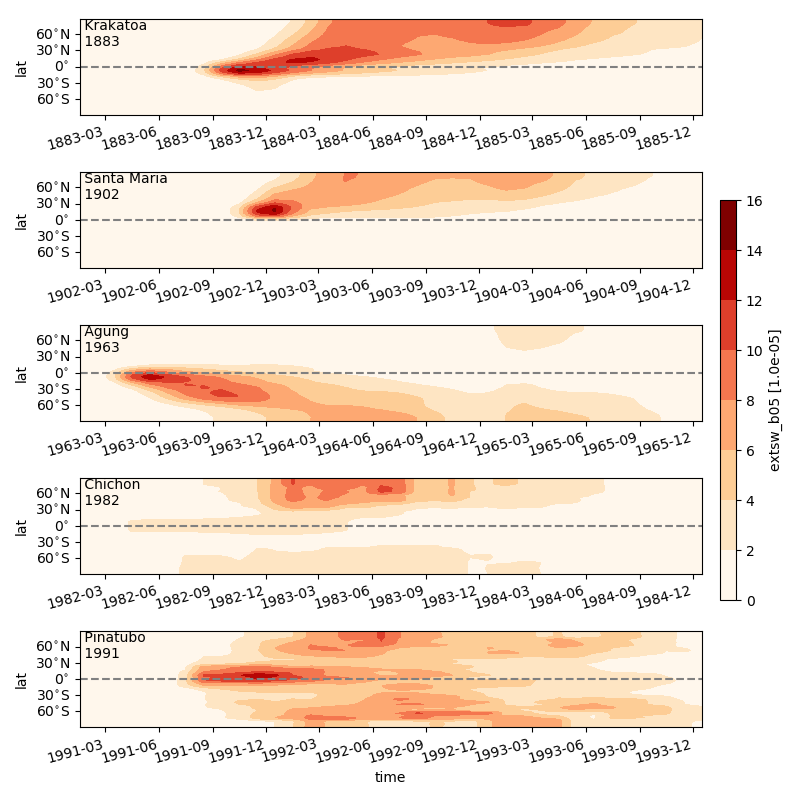

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [21]:
# deprecated

scale_factor = 1e5
da_ = da.pipe(lambda x:x*scale_factor).sel(Source='CMIP6')

fig, axes = plt.subplots(5, 1, figsize=(8,8), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)
monthticks = range(3,13,3)

plt.sca(axes[0])
da_.sel(time=slice('1883','1885')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Krakatoa\n 1883', transform=plt.gca().transAxes, 
         ha='left', va='top')
plt.title('')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


plt.sca(axes[1])
da_.sel(time=slice('1902','1904')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Santa Maria\n 1902', transform=plt.gca().transAxes, 
         ha='left', va='top')
plt.title('')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')


# plt.sca(axes[2])
# da.pipe(lambda x: x*scale_factor).sel(time=slice('1912','1914')).plot.contourf(x='time', cmap=cmap, levels=levels,
#                                                  add_colorbar=False)
# # plt.grid(True)
# plt.text(0,1, ' Novarupta\n 1912', transform=plt.gca().transAxes, 
#          ha='left', va='top')
# # plt.title('Novarupta 1912', loc='left')
# xticksmonth(monthticks)
# plt.axhline(0, color='gray', ls='--')

plt.sca(axes[2])
da_.sel(time=slice('1963','1965')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Agung\n 1963', transform=plt.gca().transAxes, 
         ha='left', va='top')
plt.title('')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[3])
da_.sel(time=slice('1982','1984')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Chichon\n 1982', transform=plt.gca().transAxes, 
         ha='left', va='top')
plt.title('')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

plt.sca(axes[4])
im = da_.sel(time=slice('1991','1993')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
# plt.grid(True)
plt.text(0,1, ' Pinatubo\n 1991', transform=plt.gca().transAxes, 
         ha='left', va='top')
plt.title('')
xticksmonth(monthticks)
plt.axhline(0, color='gray', ls='--')

yticks2lat(range(-60,90,30))
for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=15, horizontalalignment='right')

ax = fig.add_axes((.9,.25,.02,.5))
plt.colorbar(im, cax=ax, orientation='vertical', label=f'extsw_b05 [{1/scale_factor:.1e}]')

plt.tight_layout(rect=(0,0,.9,1))

<IPython.core.display.Javascript object>


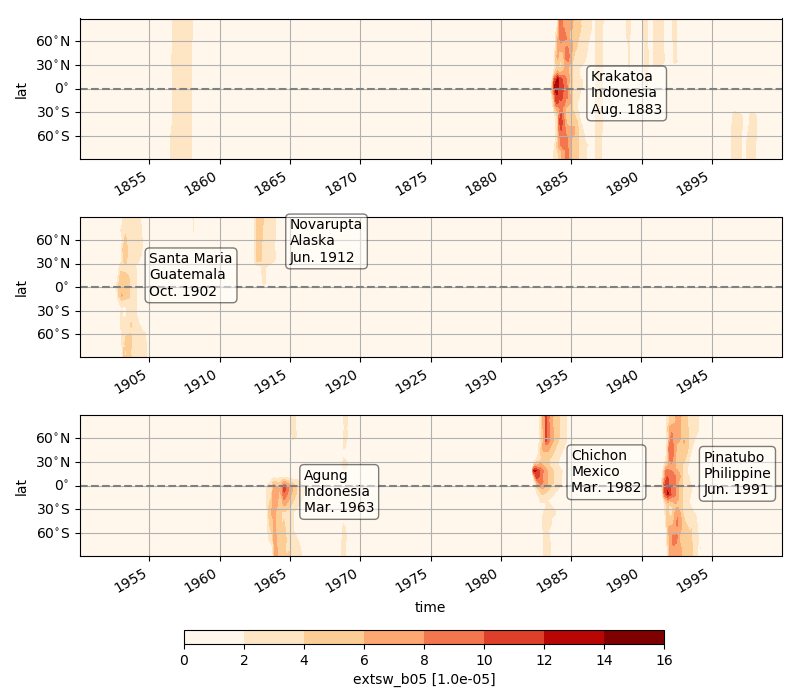

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [16]:
# CMIP5
scale_factor = 1e5
da_ = da.pipe(lambda x:x*scale_factor).sel(Source='CMIP5')

bbox = {'facecolor': 'w', 'alpha':.5, 'boxstyle': 'round'}

fig, axes = plt.subplots(3,1,figsize=(8,7), sharey=True)
cmap = 'OrRd'
levels = np.arange(0,16.1,2)

plt.sca(axes[0])
da_.sel(time=slice('1850', '1899')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)

plt.title('')
plt.xlabel('time')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1886-06', -6, 'Krakatoa\nIndonesia\nAug. 1883', va='center', bbox=bbox)


plt.sca(axes[1])
da_.sel(time=slice('1900', '1949')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                 add_colorbar=False)
plt.title('')
plt.xlabel('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1915-01', 58, 'Novarupta\nAlaska\nJun. 1912', va='center', bbox=bbox)
plt.text('1905-01', 15, 'Santa Maria\nGuatemala\nOct. 1902', va='center', bbox=bbox)


plt.sca(axes[2])
im = da_.sel(time=slice('1950', '1999')).plot.contourf(x='time', cmap=cmap, levels=levels,
                                                      add_colorbar=False)
plt.title('')
plt.grid(True)
plt.axhline(0, color='gray', ls='--')
plt.text('1994-06', 15, 'Pinatubo\nPhilippine\nJun. 1991', va='center', bbox=bbox)
plt.text('1985-01', 17, 'Chichon\nMexico\nMar. 1982', va='center', bbox=bbox)
plt.text('1966-01', -8, 'Agung\nIndonesia\nMar. 1963', va='center', bbox=bbox)


yticks2lat(np.arange(-60,61,30))

ax = fig.add_axes((.23,.08,.6,.02))
plt.colorbar(im, cax=ax, orientation='horizontal', label=f'extsw_b05 [{1/scale_factor:.1e}]', extend='both')

for ax in axes:
    plt.setp(ax.get_xticklabels(), visible=True, rotation=30, horizontalalignment='right')



plt.tight_layout(rect=(0,.1,1,1))

### Plot

In [5]:
def plot_volcanic_forcing(time_slice):
    f = da.sel(time=time_slice).plot(col='Source', y='lat')
    for ax in f.axes.flat:
        plt.sca(ax)
        plt.setp(plt.xticks()[1], rotation=45, ha='right')
        f.cbar.set_ticks(f.cbar.get_ticks())
        f.cbar.set_ticklabels([f'{x:.1e}' for x in f.cbar.get_ticks()])
    plt.yticks(range(-60,90,30))

<IPython.core.display.Javascript object>


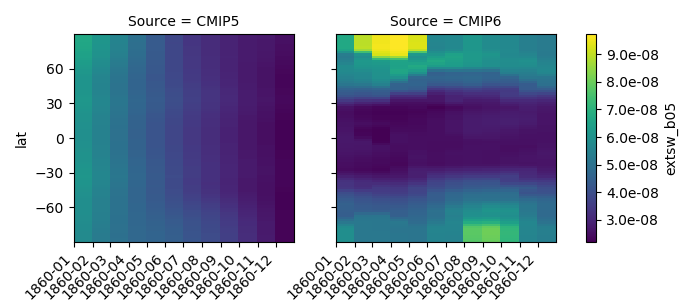

In [16]:
plot_volcanic_forcing('1860')

<IPython.core.display.Javascript object>


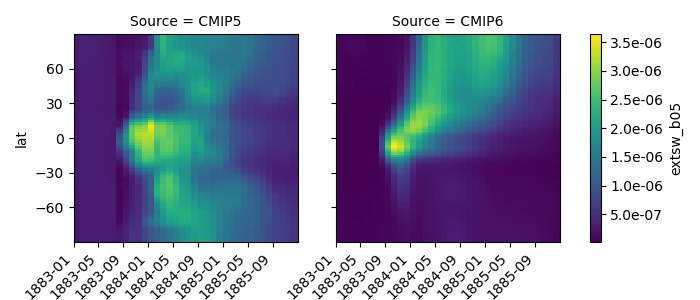

In [7]:
# Krakatau, Indonesia, 1883
plot_volcanic_forcing(slice('1883', '1885'))

<IPython.core.display.Javascript object>


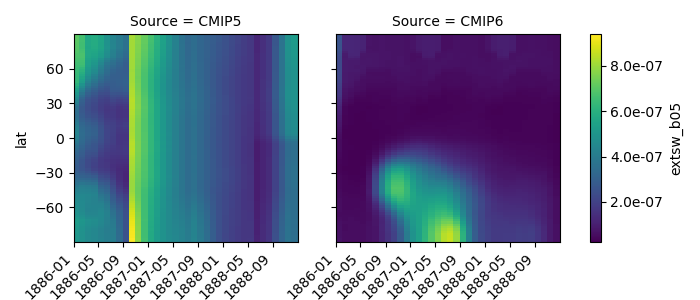

In [8]:
# Okataina[Tarawera], North Island, New Zealand, 1886
plot_volcanic_forcing(slice('1886', '1888'))

<IPython.core.display.Javascript object>


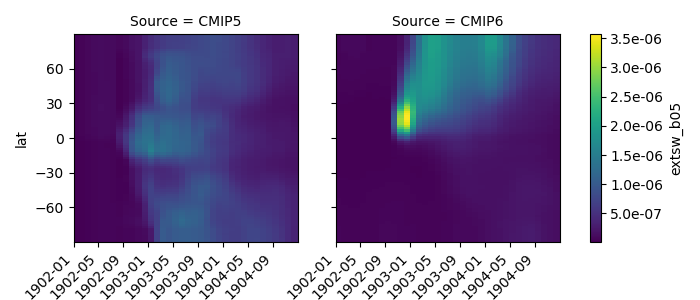

In [9]:
# Santa Maria, Guatemala, 1902
plot_volcanic_forcing(slice('1902', '1904'))

<IPython.core.display.Javascript object>


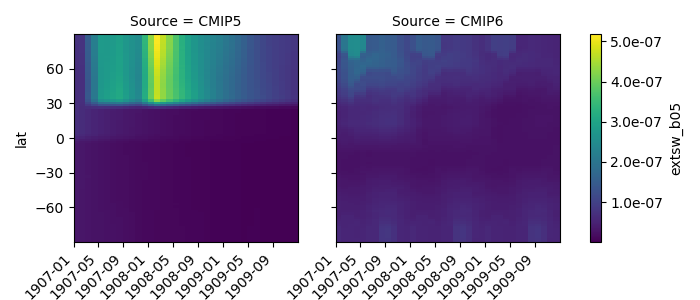

In [10]:
# Ksudach, Kamchatka, Russia, 1907
plot_volcanic_forcing(slice('1907', '1909'))

<IPython.core.display.Javascript object>


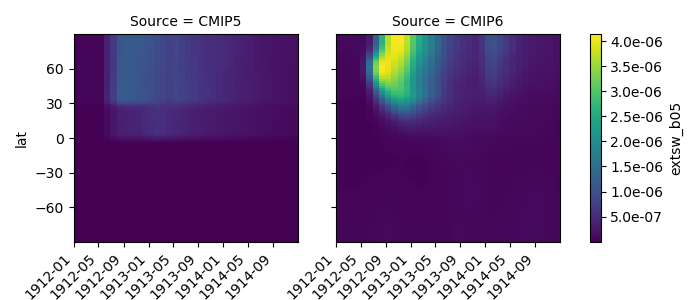

In [11]:
# Novarupta[Katmai], Alaska, United States, 1912
plot_volcanic_forcing(slice('1912', '1914'))

<IPython.core.display.Javascript object>


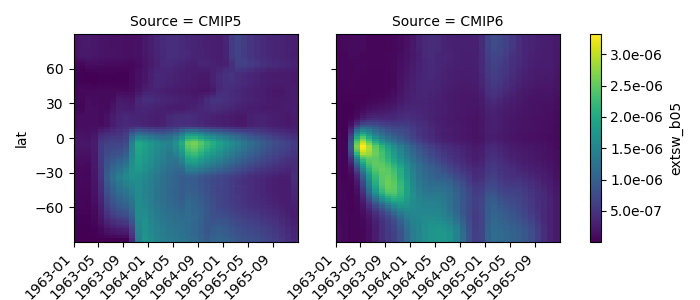

In [12]:
# Agung, Bali, Indonesia, 1963
plot_volcanic_forcing(slice('1963', '1965'))

<IPython.core.display.Javascript object>


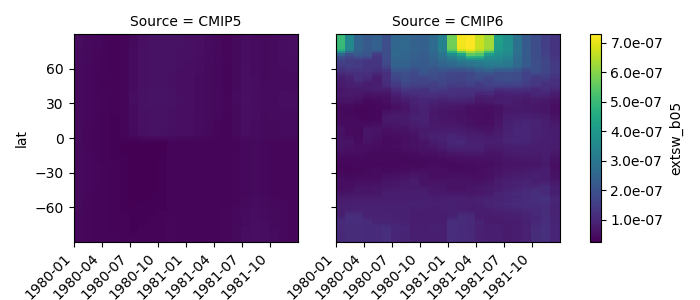

In [13]:
# Mount St. Helens, Washington, United States, 1980
plot_volcanic_forcing(slice('1980', '1981'))

<IPython.core.display.Javascript object>


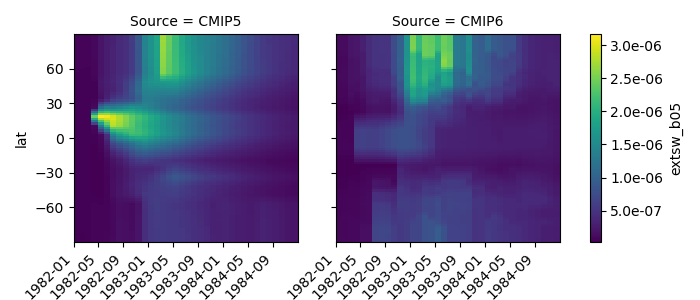

In [14]:
# El Chichon, Chiapas, Mexico, 1982
plot_volcanic_forcing(slice('1982', '1984'))

<IPython.core.display.Javascript object>


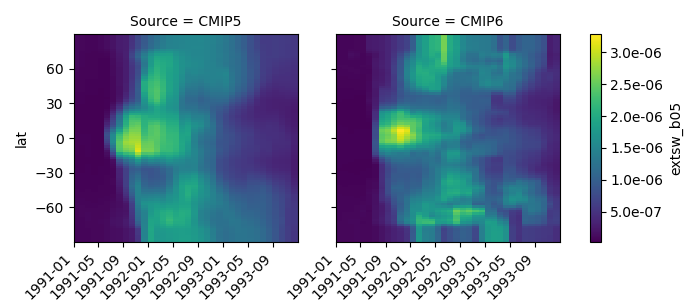

In [15]:
# Mount Pinatubo, Luzon, Philippines, 1991
plot_volcanic_forcing(slice('1991', '1993'))